In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')

In [3]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)
Index = list(X_train.columns)

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [4]:
print(X_train[:4])
print(y_train[:4])

   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


In [5]:
def pd2np(df):
    return df.values

In [6]:
X_train = pd2np(X_train)
y_train = pd2np(y_train)

X_test = pd2np(X_test)

In [7]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(52399, 8)


<h4>Slicing and standardlizing the data</h4>

In [8]:
#slice the data
from sklearn.model_selection import train_test_split

X_train2, X_valid, y_train2, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=0)


<h3>APPROACH 1: use all features</h3>
<h4>decision tree method</h4>

best depth is 5
accuracy(test): 0.618
accuracy(valid): 0.625
accuracy(cross-valid): 0.616


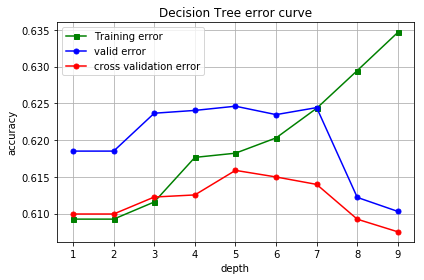

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree_error_train=[]
tree_error_valid=[]
cross_valid_score=[]

for i in range(1,10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    tree.fit(X_train2, y_train2)
    y_pred_train = tree.predict(X_train2)
    score = accuracy_score(y_train2, y_pred_train)
    tree_error_train.append(score)
    y_pred_valid = tree.predict(X_valid)
    score = accuracy_score(y_valid, y_pred_valid)
    tree_error_valid.append(score)
    score = cross_val_score(estimator=tree, X=np.vstack([X_train2,X_valid]), y=np.vstack([y_train2,y_valid]), cv=10)
    cross_valid_score.append(score.mean())

plt.plot(list(range(1,10)), tree_error_train,
    color='green', marker='s',
    markersize=5,
    label='Training error')    

plt.plot(list(range(1,10)), tree_error_valid,
    color='blue', marker='o',
    markersize=5,
    label='valid error')

plt.plot(list(range(1,10)), cross_valid_score,
    color='red', marker='o',
    markersize=5,
    label='cross validation error')

plt.title('Decision Tree error curve')
plt.grid()
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.tight_layout()

index=cross_valid_score.index(max(cross_valid_score))+1
print('best depth is %d' % index)
print('accuracy(test): %.3f' % tree_error_train[index-1])
print('accuracy(valid): %.3f' % tree_error_valid[index-1])
print('accuracy(cross-valid): %.3f' % cross_valid_score[index-1])

<h4>random forest method</h4>

Method: Random Forset

best # of trees is 18
accuracy(test): 0.995
accuracy(valid): 0.587
accuracy(cross-valid): 0.587


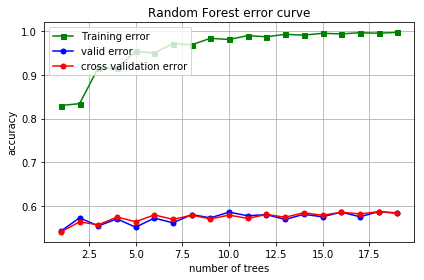

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest_error_train=[]
forest_error_valid=[]
cross_valid_score=[]

for i in range(1,20):
    forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i, 
                                random_state=1,
                                n_jobs=2)
    forest.fit(X_train2, y_train2.flatten())
    
    y_pred_train = forest.predict(X_train2)
    score = accuracy_score(y_train2, y_pred_train)
    forest_error_train.append(score)
    y_pred_valid = forest.predict(X_valid)
    score = accuracy_score(y_valid, y_pred_valid)
    forest_error_valid.append(score)
    score = cross_val_score(estimator=forest, X=np.vstack([X_train2,X_valid]), y=np.vstack([y_train2,y_valid]).flatten(), cv=10)
    cross_valid_score.append(score.mean())


plt.plot(list(range(1,20)), forest_error_train,
    color='green', marker='s',
    markersize=5,
    label='Training error')    

plt.plot(list(range(1,20)), forest_error_valid,
    color='blue', marker='o',
    markersize=5,
    label='valid error')

plt.plot(list(range(1,20)), cross_valid_score,
    color='red', marker='o',
    markersize=5,
    label='cross validation error')

plt.title('Random Forest error curve')
plt.grid()
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.tight_layout()

print("Method: Random Forset\n")

index=cross_valid_score.index(max(cross_valid_score))+1
print('best # of trees is %d' % index)
print('accuracy(test): %.3f' % forest_error_train[index-1])
print('accuracy(valid): %.3f' % forest_error_valid[index-1])
print('accuracy(cross-valid): %.3f' % cross_valid_score[index-1])

<h3>APPROACH 2: SELECT 3 FEATURES</h3>
<h4><font color=blue>using forest.feature_importances_ to select features<font><h4>

 1) GAME_CLOCK                     0.201869
 2) SHOT_DIST                      0.199244
 3) SHOT_CLOCK                     0.177807
 4) CLOSE_DEF_DIST                 0.170428
 5) TOUCH_TIME                     0.138456
 6) PERIOD                         0.053881
 7) DRIBBLES                       0.051322
 8) PTS_TYPE                       0.006992


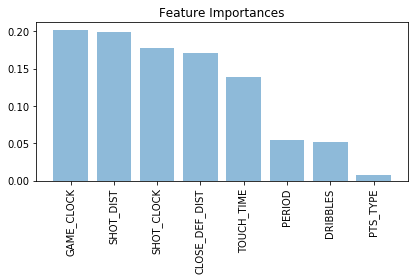

In [11]:
#using forest.feature_importances_
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
index = np.array(Index)

for f in range(X_train2.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            Index[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train2.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train2.shape[1]), 
           index[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

from the chart we select 3 features as GAME_CLOCK, SHOT_DIST, SHOT_CLOCK

<h4>decision tree method</h4>

Method: Decision Tree

best depth is 5
accuracy(test): 0.613
accuracy(valid): 0.618
accuracy(cross-valid): 0.611


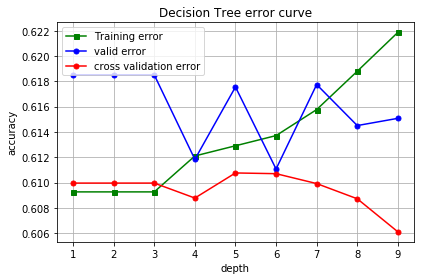

In [12]:
Z_train = X_train2[:,indices[[0,1,2]]]
Z_valid = X_valid[:,indices[[0,1,2]]]

print("Method: Decision Tree\n")
tree_error_train=[]
tree_error_valid=[]
cross_valid_score=[]

for i in range(1,10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    tree.fit(Z_train, y_train2)
    y_pred_train = tree.predict(Z_train)
    score = accuracy_score(y_train2, y_pred_train)
    tree_error_train.append(score)
    y_pred_valid = tree.predict(Z_valid)
    score = accuracy_score(y_valid, y_pred_valid)
    tree_error_valid.append(score)
    score = cross_val_score(estimator=tree, X=np.vstack([Z_train,Z_valid]), y=np.vstack([y_train2,y_valid]), cv=10)
    cross_valid_score.append(score.mean())

plt.plot(list(range(1,10)), tree_error_train,
    color='green', marker='s',
    markersize=5,
    label='Training error')    

plt.plot(list(range(1,10)), tree_error_valid,
    color='blue', marker='o',
    markersize=5,
    label='valid error')

plt.plot(list(range(1,10)), cross_valid_score,
    color='red', marker='o',
    markersize=5,
    label='cross validation error')

plt.title('Decision Tree error curve')
plt.grid()
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.tight_layout()

index=cross_valid_score.index(max(cross_valid_score))+1
print('best depth is %d' % index)
print('accuracy(test): %.3f' % tree_error_train[index-1])
print('accuracy(valid): %.3f' % tree_error_valid[index-1])
print('accuracy(cross-valid): %.3f' % cross_valid_score[index-1])

<h4>random forest method</h4>

Method: Random Forset

best # of trees is 18
accuracy(test): 0.990
accuracy(valid): 0.561
accuracy(cross-valid): 0.558


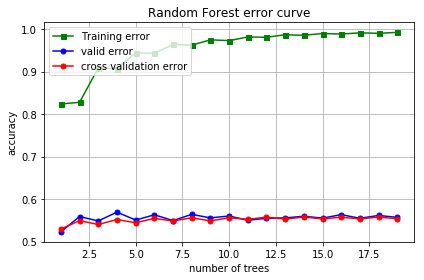

In [13]:
#random forest
forest_error_train=[]
forest_error_valid=[]
cross_valid_score=[]
for i in range(1,20):
    forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i, 
                                random_state=1,
                                n_jobs=2)
    forest.fit(Z_train, y_train2.flatten())
    
    y_pred_train = forest.predict(Z_train)
    score = accuracy_score(y_train2, y_pred_train)
    forest_error_train.append(score)
    y_pred_valid = forest.predict(Z_valid)
    score = accuracy_score(y_valid, y_pred_valid)
    forest_error_valid.append(score)
    score = cross_val_score(estimator=forest, X=np.vstack([Z_train,Z_valid]), y=np.vstack([y_train2,y_valid]).flatten(), cv=10)
    cross_valid_score.append(score.mean())


plt.plot(list(range(1,20)), forest_error_train,
    color='green', marker='s',
    markersize=5,
    label='Training error')    

plt.plot(list(range(1,20)), forest_error_valid,
    color='blue', marker='o',
    markersize=5,
    label='valid error')

plt.plot(list(range(1,20)), cross_valid_score,
    color='red', marker='o',
    markersize=5,
    label='cross validation error')

plt.title('Random Forest error curve')
plt.grid()
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.tight_layout()

print("Method: Random Forset\n")

index=cross_valid_score.index(max(cross_valid_score))+1
print('best # of trees is %d' % index)
print('accuracy(test): %.3f' % forest_error_train[index-1])
print('accuracy(valid): %.3f' % forest_error_valid[index-1])
print('accuracy(cross-valid): %.3f' % cross_valid_score[index-1])


<h4><font color=blue>brutal force</font></h4>
<h4>decision tree method</h4>

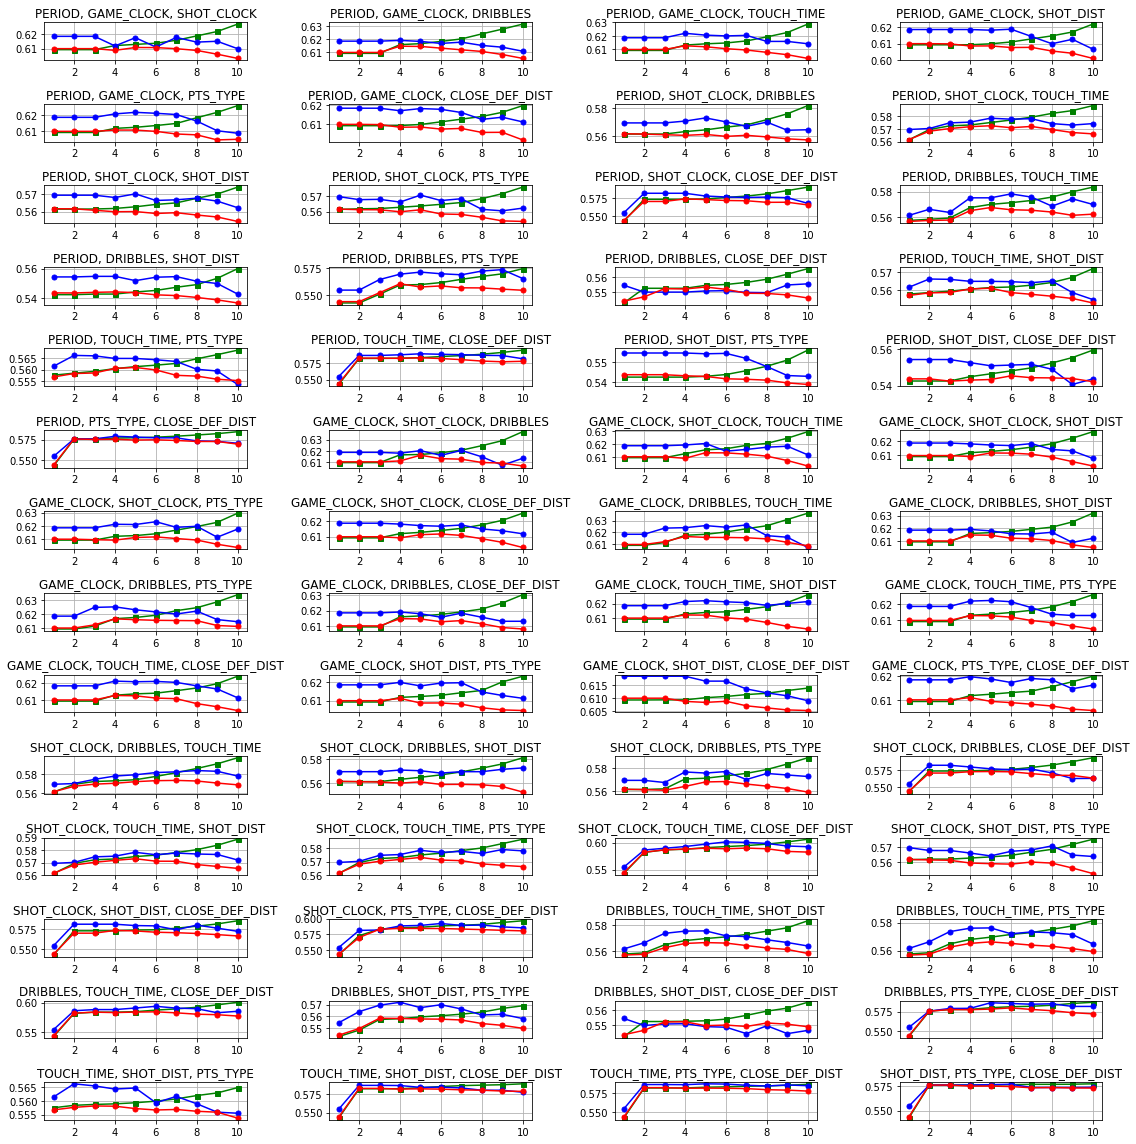

best features is GAME_CLOCK, DRIBBLES, PTS_TYPE
best depth is 4
accuracy(test): 0.617
accuracy(valid): 0.625
accuracy(cross-valid): 0.617


In [14]:
from itertools import combinations
comb = list(combinations(list(range(0,8)), 3))

_, subplot_arr = plt.subplots(14, 4, figsize=(16, 16))
index = np.array(Index)
max_score = 0;

for idx in range(0,len(comb)):
    Z_train = X_train2[:,indices[list(comb[idx])]]
    Z_valid = X_valid[:,indices[list(comb[idx])]]
    
    x_idx = idx // 4
    y_idx = idx % 4
    
    tree_error_train=[]
    tree_error_valid=[]
    cross_valid_score=[]

    for i in range(1,11):
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
        tree.fit(Z_train, y_train2)
        y_pred_train = tree.predict(Z_train)        
        score = accuracy_score(y_train2, y_pred_train)
        tree_error_train.append(score)
        y_pred_valid = tree.predict(Z_valid)
        score = accuracy_score(y_valid, y_pred_valid)
        tree_error_valid.append(score)
        score = cross_val_score(estimator=tree, X=np.vstack([Z_train,Z_valid]), y=np.vstack([y_train2,y_valid]), cv=10)
        cross_valid_score.append(score.mean())
    
    subplot_arr[x_idx, y_idx].plot(list(range(1,11)), tree_error_train,
        color='green', marker='s',
        markersize=5,
        label='Training error')    

    subplot_arr[x_idx, y_idx].plot(list(range(1,11)), tree_error_valid,
        color='blue', marker='o',
        markersize=5,
        label='valid error')
    
    subplot_arr[x_idx, y_idx].plot(list(range(1,11)), cross_valid_score,
        color='red', marker='o',
        markersize=5,
        label='cross validation error')

    subplot_arr[x_idx, y_idx].grid()
    subplot_arr[x_idx, y_idx].set_title(', '.join(index[list(comb[idx])]))

    if score.mean() > max_score:
        max_score = score.mean()
        features = ', '.join(index[list(comb[idx])])
        depth = cross_valid_score.index(max(cross_valid_score))+1
        train_score = tree_error_train[depth-1]
        valid_score = tree_error_valid[depth-1]
        cross_score = cross_valid_score[depth-1]
    
plt.tight_layout()
plt.savefig('./output/brutal.png', dpi=300)
plt.show()

print('best features is %s' % features)
print('best depth is %d' % depth)
print('accuracy(test): %.3f' % train_score)
print('accuracy(valid): %.3f' % valid_score)
print('accuracy(cross-valid): %.3f' % cross_score)

<h4>random forest method</h4>
note: I skip the cross-validation part since it's time-consuming

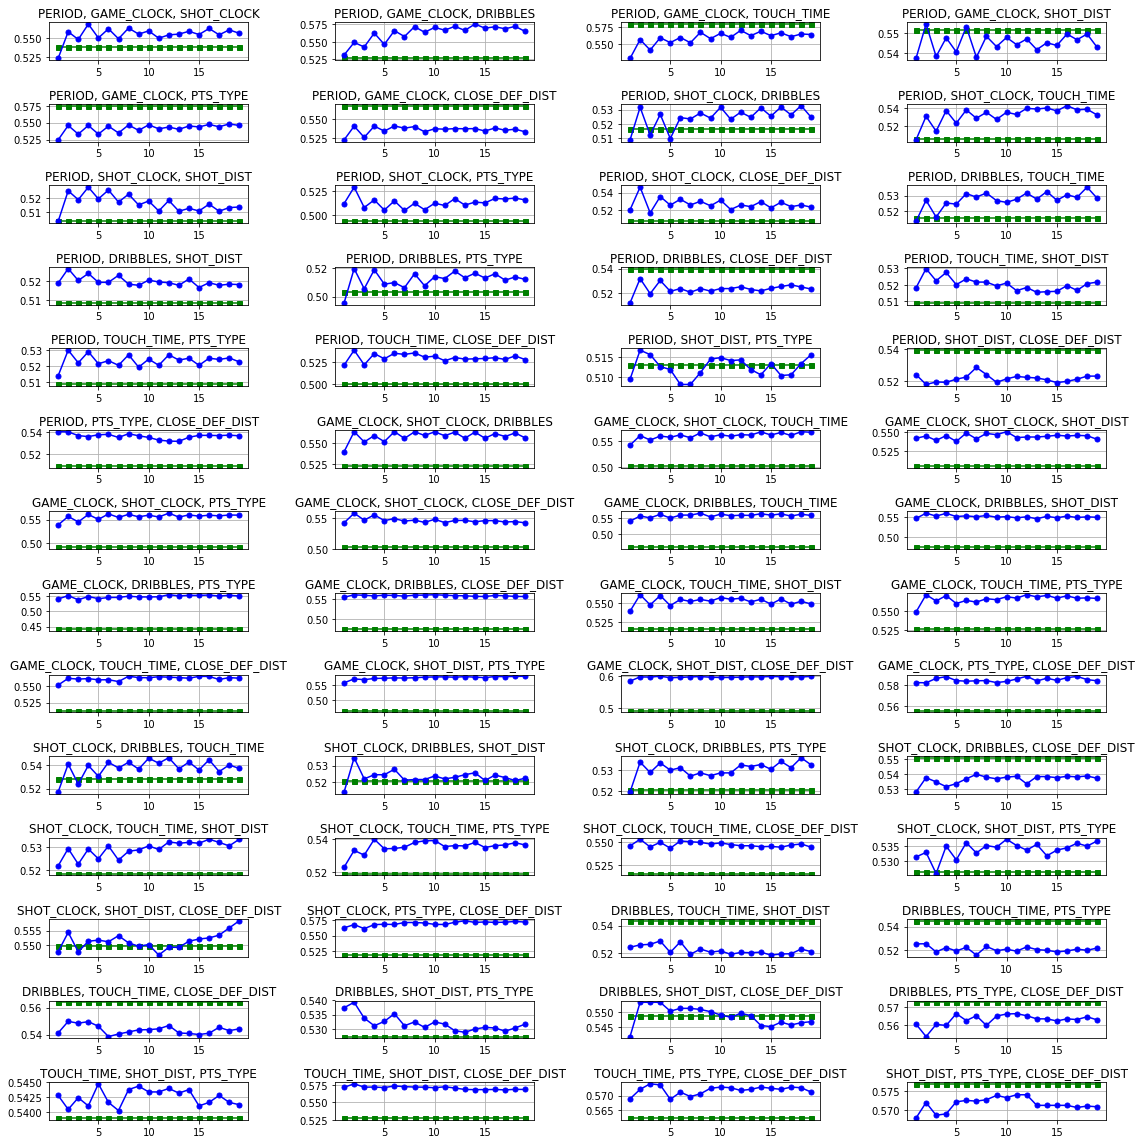

best features is GAME_CLOCK, SHOT_DIST, CLOSE_DEF_DIST
best #of trees is 4
accuracy(test): 0.494
accuracy(valid): 0.599


In [15]:

_, subplot_arr2 = plt.subplots(14, 4, figsize=(16, 16))
max_score = 0;

for idx in range(0,len(comb)):
    Z_train = X_train2[:,indices[list(comb[idx])]]
    Z_valid = X_valid[:,indices[list(comb[idx])]]
    
    x_idx = idx // 4
    y_idx = idx % 4
    
    #print(index[list(comb[idx])])
    forest_error_train=[]
    forest_error_valid=[]

    for i in range(1,20):
        forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i, 
                                random_state=1,
                                n_jobs=2)
        forest.fit(Z_train, y_train2.flatten())
        y_pred_train = tree.predict(Z_train)
        score = accuracy_score(y_train2, y_pred_train)
        forest_error_train.append(score)
        y_pred_valid = forest.predict(Z_valid)
        score = accuracy_score(y_valid, y_pred_valid)
        forest_error_valid.append(score)
    subplot_arr2[x_idx, y_idx].plot(list(range(1,20)), forest_error_train,
        color='green', marker='s',
        markersize=5,
        label='Training error')    

    subplot_arr2[x_idx, y_idx].plot(list(range(1,20)), forest_error_valid,
        color='blue', marker='o',
        markersize=5,
        label='valid error')

    subplot_arr2[x_idx, y_idx].grid()
    subplot_arr2[x_idx, y_idx].set_title(', '.join(index[list(comb[idx])]))

    if score.mean() > max_score:
        max_score = score.mean()
        features = ', '.join(index[list(comb[idx])])
        depth = forest_error_valid.index(max(forest_error_valid))+1
        train_score = forest_error_train[depth-1]
        valid_score = forest_error_valid[depth-1]

    
plt.tight_layout()
plt.savefig('./output/brutal2.png', dpi=300)
plt.show()

print('best features is %s' % features)
print('best #of trees is %d' % depth)
print('accuracy(test): %.3f' % train_score)
print('accuracy(valid): %.3f' % valid_score)


<h1><center>CONCLUSION</center></h1>

<h3><center>APPROACH 1: USE ALL FEATURES</center></h3>

|Model|accuracy(TEST)|accuracy(VALID)|accuracy(CROSS VALID)|complexity|
|-------------|-------------|-------|------|---|
|Decision Tree|0.618|0.625|0.616|depth = 5|
|Random Forest|0.995|0.587|0.587|# of trees = 18|


<h3><center>APPROACH 2: SELECT 3 FEATURES</center></h3>
<h4><center>forest.feature_importances_</center></h4>
<h5><center>selected feature: GAME_CLOCK, SHOT_DIST, SHOT_CLOCK </center></h5>

|Model|accuracy(TEST)|accuracy(VALID)|accuracy(CROSS VALID)|complexity|
|-------------|-------------|------|------|---|
|Decision Tree|0.613|0.618|0.611|depth = 5|
|Random Forest|0.990|0.561|0.558|# of trees = 18|

<h5><center>brutal method</center></h5>

|Model|accuracy(TEST)|accuracy(VALID)|accuracy(CROSS VALID)|complexity|features|
|-------------|-------------|------|------|---|---|
|Decision Tree|0.617|0.625|0.617|depth = 4|GAME_CLOCK, DRIBBLES, PTS_TYPE|
|Random Forest|0.494|0.598|------|# of trees = 11|GAME_CLOCK, SHOT_DIST, CLOSE_DEF_DIST|

<h2>output data</h2>
<h6>from the table above</h6>
<h6>choose model : decision tree, depth=4</h6> 
<h6>3 features as GAME_CLOCK, DRIBBLES, PTS_TYPE</h6>

In [18]:
Z_train = X_train2[:,indices[[0,6,7]]]
Z_valid = X_valid[:,indices[[0,6,7]]]
    
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree.fit(Z_train, y_train2)
y_pred_test = tree.predict(X_test[:,indices[[0,6,7]]])
out = pd.DataFrame(y_pred_test)
out.columns = ['FGM']
pd.export_csv = out.to_csv (r'./output/y_pred.csv', index = None, header=True)